In [16]:
using Yao
using SymPy

In [9]:
S=YaoBlocks.ConstGate.S

S

In [32]:
@vars α
@vars β

(β,)

In [55]:
circuit = chain(
    2,
    put(2=>S'),
    put(2=>H),
    put(2=>T'),
    cnot(1,2),
    put(2=>T),
    put(2=>H),
    put(2=>S),
    cnot(2,1)
)

nqubits: 2
chain
├─ put on (2)
│  └─ Sdag
├─ put on (2)
│  └─ H
├─ put on (2)
│  └─ Tdag
├─ control(1)
│  └─ (2,) X
├─ put on (2)
│  └─ T
├─ put on (2)
│  └─ H
├─ put on (2)
│  └─ S
└─ control(2)
   └─ (1,) X


In [56]:
using StatsBase, Plots

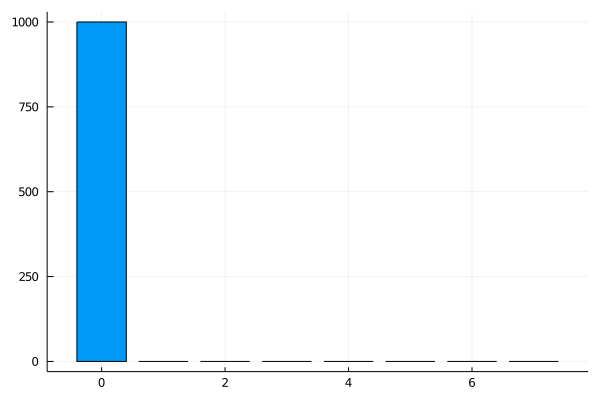

In [57]:
results=ArrayReg(bit"00")|>circuit|> r->measure(r, nshots=1000);
hist = fit(Histogram, Int.(results), 0:8)
bar(hist.edges[1] .- 0.5, hist.weights, legend=:none)

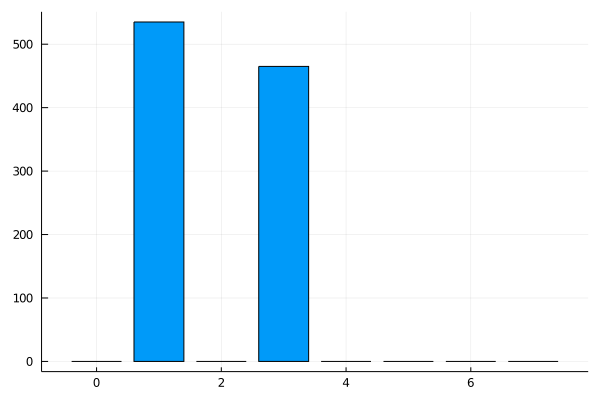

In [58]:
results=ArrayReg(bit"01")|>chain(2,control(2,1,2=>H))|> r->measure(r, nshots=1000);
hist = fit(Histogram, Int.(results), 0:8)
bar(hist.edges[1] .- 0.5, hist.weights, legend=:none)

In [59]:
circuit|>mat*

LoadError: syntax: incomplete: premature end of input

In [60]:
# notice that in Yao, the order of qubit is decreasing from top to bottom

chain(2,control(2,2,1=>H))|>mat|>Array

4×4 Array{Complex{Float64},2}:
 1.0+0.0im  0.0+0.0im       0.0+0.0im        0.0+0.0im
 0.0+0.0im  1.0+0.0im       0.0+0.0im        0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.707107+0.0im   0.707107+0.0im
 0.0+0.0im  0.0+0.0im  0.707107+0.0im  -0.707107+0.0im

In [61]:
α*ArrayReg(bit"00")+β*ArrayReg(bit"01")

┌ Warning: Input type of `ArrayReg` is not Complex, got Sym
└ @ YaoArrayRegister /home/neuromancer/.julia/packages/YaoArrayRegister/LaQDT/src/register.jl:54


ArrayReg{1, Sym, Array...}
    active qubits: 2/2

In [62]:
circuit|>mat|>Array

4×4 Array{Complex{Float64},2}:
 1.0+0.0im       0.0+0.0im  0.0+0.0im        0.0+0.0im
 0.0+0.0im  0.707107+0.0im  0.0+0.0im   0.707107+0.0im
 0.0+0.0im  0.707107+0.0im  0.0+0.0im  -0.707107-0.0im
 0.0+0.0im       0.0+0.0im  1.0+0.0im        0.0+0.0im

In [63]:
ψ=(circuit|>mat|>Array)*Array([α,β,0,0])

4-element Array{Sym,1}:
               1.0*α
 0.707106781186547*β
 0.707106781186547*β
                   0

In [64]:
ψ*ψ.transpose()

4×4 Array{Sym,2}:
               1.0*α^2  0.707106781186547*α*β  0.707106781186547*α*β  0
 0.707106781186547*α*β                0.5*β^2                0.5*β^2  0
 0.707106781186547*α*β                0.5*β^2                0.5*β^2  0
                     0                      0                      0  0